# EDA & Stock Market Analysis

For this, we need a library called [**pandas-datareader**](https://pandas-datareader.readthedocs.io/en/latest).

In [4]:
# install pandas datareader library
! pip install pycryptodome pycryptodomex

You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
! pip uninstall --yes pandas-datareader

Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Successfully uninstalled pandas-datareader-0.10.0


In [6]:
! pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to c:\users\sayan\appdata\local\temp\pip-req-build-8fwzgome
  Created wheel for pandas-datareader: filename=pandas_datareader-0+untagged.811.gea66d6b-py3-none-any.whl size=111746 sha256=c60f06022dadf874f0b44a108e1ae8e30a61d5b099b8d9e390e0b1e3c17c3384
  Stored in directory: c:\users\sayan\appdata\local\pip\cache\wheels\24\b2\87\2c66651436c14de4e053ceb5b48684d11d8b79040bf6bcd790
Successfully built pandas-datareader


You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
# import the required libraries along with other libraries
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime

plt.style.use('default')

In [2]:
# read financial dataset using the pandas-datareader

# you can import the last 5 years data for a specific company
df_tesla = pdr.get_data_yahoo("TSLA") # Tesla stock price
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-16,23.000000,22.320000,22.502666,22.670668,97114500.0,22.670668
2018-01-17,23.266666,22.650000,22.698000,23.143999,106552500.0,23.143999
2018-01-18,23.486668,22.916000,23.044666,22.971333,85287000.0,22.971333
2018-01-19,23.372667,22.840000,23.000000,23.334667,73324500.0,23.334667
2018-01-22,23.855333,23.280001,23.293333,23.437332,93156000.0,23.437332


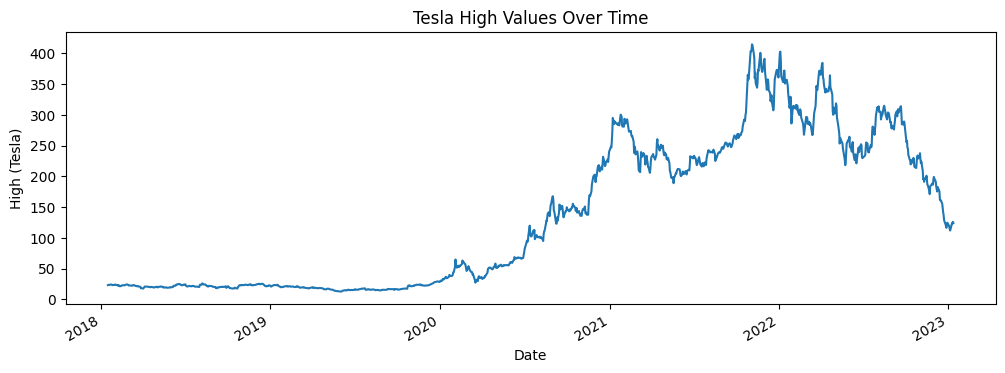

In [3]:
df_tesla["High"].plot(figsize=(12, 4))
plt.ylabel("High (Tesla)")
plt.title("Tesla High Values Over Time")
plt.show()

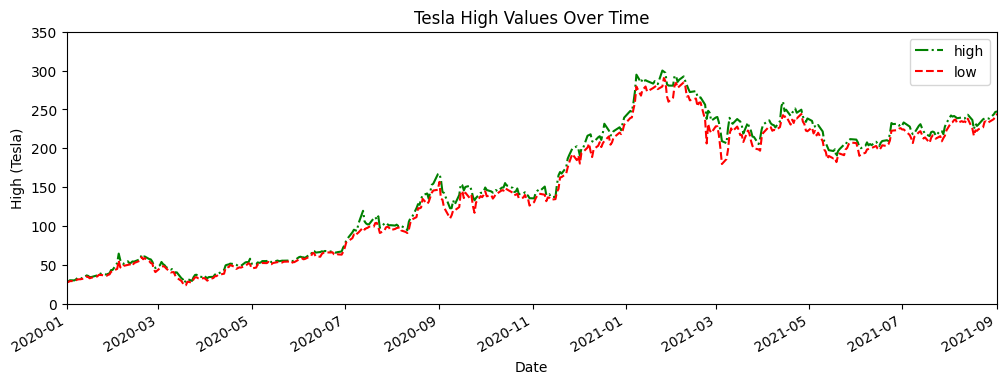

In [4]:
ax = df_tesla["High"].plot(figsize=(12, 4), c="g", ls="-.", label="high")
df_tesla["Low"].plot(ax=ax, c="r", ls="--", label="low")
plt.ylabel("High (Tesla)")
plt.title("Tesla High Values Over Time")
plt.xlim(["2020-01-01", "2021-09-01"])
plt.ylim([0, 350])
plt.legend()
plt.show()

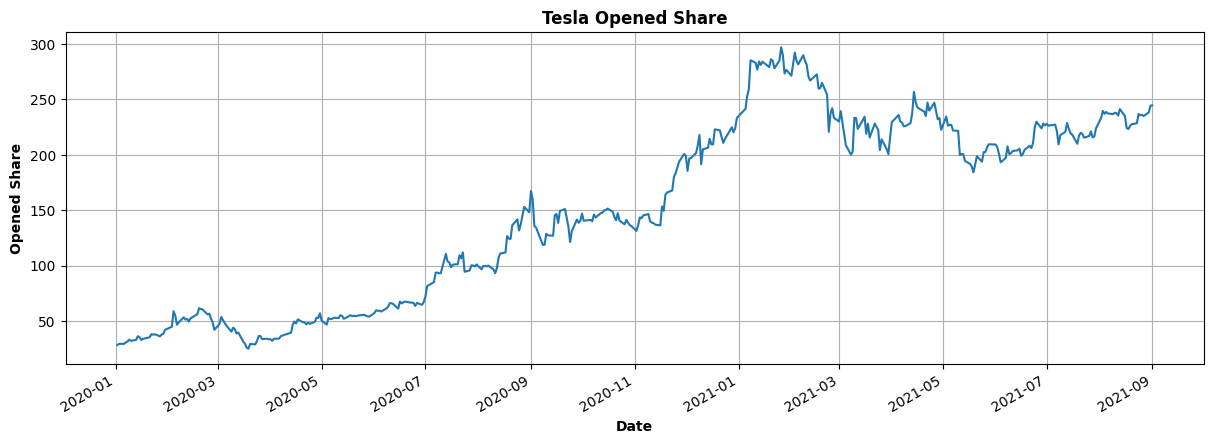

In [5]:
# extract the dates
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']["Open"]

fig, axs = plt.subplots(figsize=(12, 4))
fig.autofmt_xdate() # will help to adjust the x-ticks to visualize better
plt.tight_layout()
axs.plot(index, share_open)
axs.set_xlabel("Date", fontweight="bold")
axs.set_ylabel("Opened Share", fontweight="bold")
axs.set_title("Tesla Opened Share", fontweight="bold")
axs.grid()
plt.show()

In [6]:
## datetime index
df_tesla = df_tesla.reset_index()
print(df_tesla.info())

# the "Date" column is automatically a datetime object
# But most of the cases, this will be object (string).
# You can convert it by using pd.to_datetime(df[column])
# pd.to_datetime(df_tesla["Date"])

# convert the "Date" column again to index
df_tesla = df_tesla.set_index("Date", drop=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB
None


In [7]:
datetime.datetime(2022,11, 21) # year, month, day, hour, minute, second, microsecond,tzinfo

datetime.datetime(2022, 11, 21, 0, 0)

In [8]:
# current date while executing this cell
datetime.datetime.now()

datetime.datetime(2023, 1, 13, 8, 30, 11, 636708)

In [9]:
# can measure the total time execution using this module
def add_num(num1, num2):
    return num1 + num2

start_time = datetime.datetime.now()
num1 = 20
num2 = 30
for i in range(100000):
    pass
print(add_num(num1, num2))
end_time = datetime.datetime.now()
print(end_time - start_time)

50
0:00:00.001998


In [10]:
date = datetime.datetime(2022, 11, 21)

date.date()

datetime.date(2022, 11, 21)

In [11]:
print(f"Day:     {date.day}")
print(f"Weekday: {date.weekday()}")
print(f"Year:    {date.year}")
print(f"Month:   {date.month}")

Day:     21
Weekday: 0
Year:    2022
Month:   11


## Time Resampling


In [12]:
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2018-01-16,2018-01-16,23.000000,22.320000,22.502666,22.670668,97114500.0,22.670668
2018-01-17,2018-01-17,23.266666,22.650000,22.698000,23.143999,106552500.0,23.143999
2018-01-18,2018-01-18,23.486668,22.916000,23.044666,22.971333,85287000.0,22.971333
2018-01-19,2018-01-19,23.372667,22.840000,23.000000,23.334667,73324500.0,23.334667
2018-01-22,2018-01-22,23.855333,23.280001,23.293333,23.437332,93156000.0,23.437332


In [13]:
df_tesla.resample(rule="A")

In [14]:
df_tesla.resample(rule="A").mean(numeric_only=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,21.560857,20.678945,21.127639,21.128578,1.305025e+08,21.128578
2019-12-31,18.509987,17.907503,18.201876,18.235347,1.373838e+08,18.235347
2020-12-31,99.096137,93.565979,96.369476,96.665689,2.259239e+08,96.665689
2021-12-31,265.243941,254.236045,259.946429,259.998162,8.217489e+07,259.998162
2022-12-31,270.567716,256.507357,264.135232,263.093081,8.693445e+07,263.093081
2023-12-31,119.486249,111.333750,115.721250,116.317498,1.876476e+08,116.317498


In [15]:
df_tesla.resample(rule="A").max(numeric_only=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,221923300.0,399.926666
2023-12-31,125.949997,120.510002,122.559998,123.559998,231402800.0,123.559998


<AxesSubplot: xlabel='Date'>

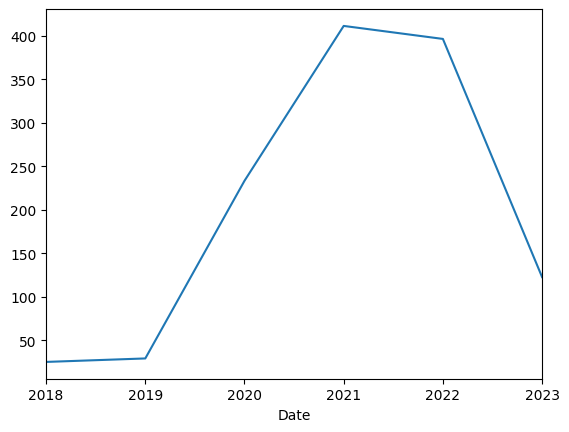

In [16]:
# rule A: year & frequency
df_tesla.resample(rule="A").max(numeric_only=True)["Open"].plot()
#plt.show()

In [17]:
# rule QS: quarterly start frequency
df_tesla.resample(rule="QS").max(numeric_only=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-01-01,64.599335,60.068001,61.566666,61.161331,914082000.0,61.161331


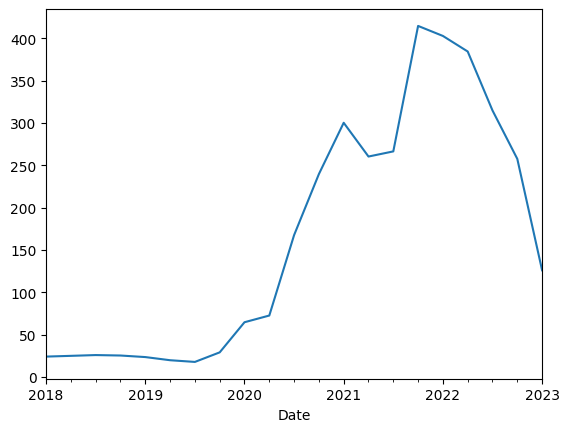

In [18]:
df_tesla.resample(rule="QS").max(numeric_only=True)["High"].plot()
plt.show()

In [21]:
## business end frequency
## https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule="BA").max()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2018-12-31,2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,2022-12-30,402.666656,378.679993,396.516663,399.926666,221923300.0,399.926666
2023-12-29,2023-01-12,125.949997,120.510002,122.559998,123.559998,231402800.0,123.559998


In [23]:
df_tesla.resample(rule="BQS").max()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2018-01-01,2018-03-29,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,2018-06-29,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,2018-09-28,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,2018-12-31,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,2019-03-29,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,2019-06-28,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,2019-09-30,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-01-01,2020-03-31,64.599335,60.068001,61.566666,61.161331,914082000.0,61.161331


<AxesSubplot: xlabel='Date'>

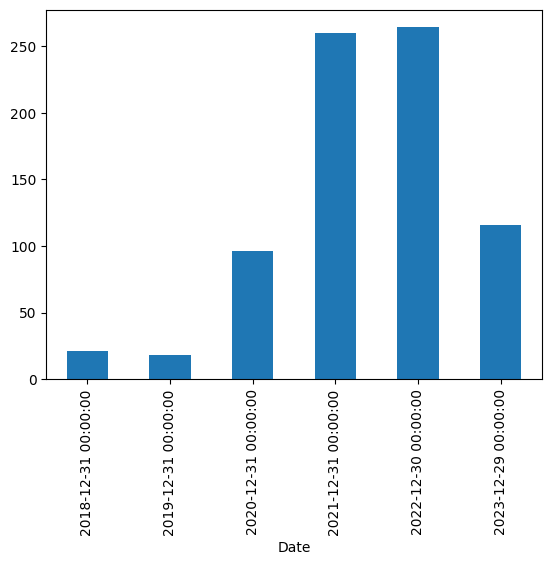

In [24]:
df_tesla["Open"].resample(rule="BA").mean().plot.bar()

<AxesSubplot: xlabel='Date'>

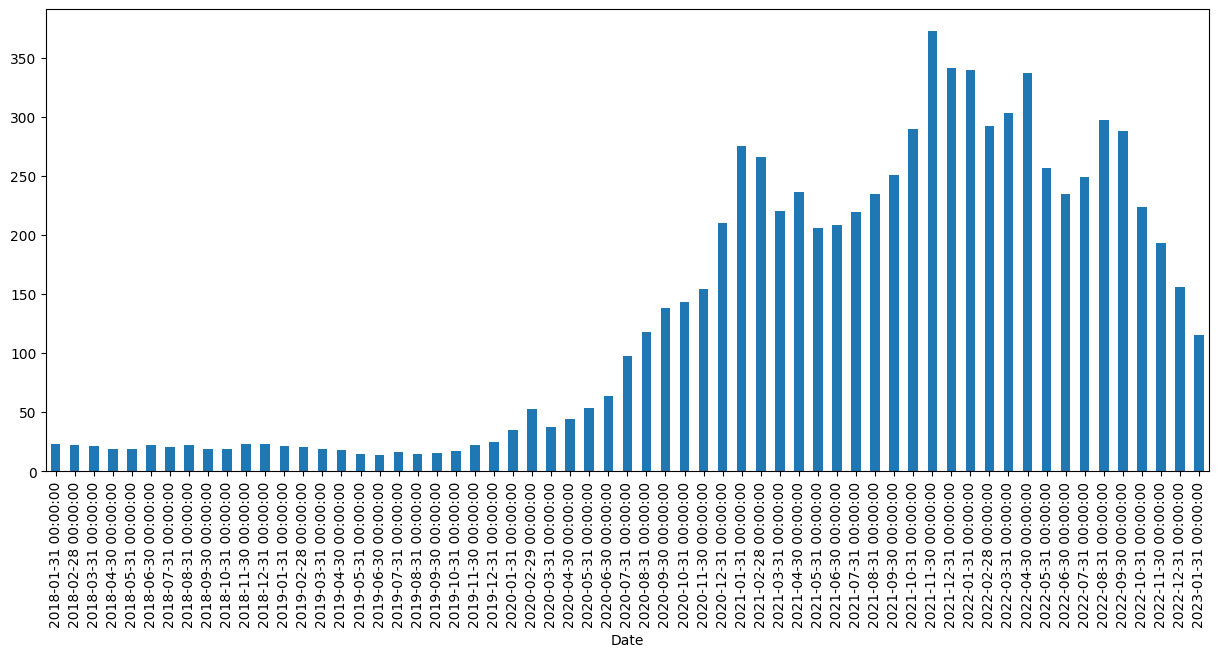

In [26]:
df_tesla["Open"].resample(rule="M").mean().plot.bar(figsize=(15, 6))

In [27]:
df_tesla["High"].head()

Date
2018-01-16    23.000000
2018-01-17    23.266666
2018-01-18    23.486668
2018-01-19    23.372667
2018-01-22    23.855333
Name: High, dtype: float64

In [28]:
df_tesla["High"].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [31]:
df_tesla["High"].rolling(10).mean().head(21)

Date
2018-01-16          NaN
2018-01-17          NaN
2018-01-18          NaN
2018-01-19          NaN
2018-01-22          NaN
2018-01-23          NaN
2018-01-24          NaN
2018-01-25          NaN
2018-01-26          NaN
2018-01-29    23.426800
2018-01-30    23.448600
2018-01-31    23.496533
2018-02-01    23.545600
2018-02-02    23.554667
2018-02-05    23.465600
2018-02-06    23.303733
2018-02-07    23.245400
2018-02-08    23.241533
2018-02-09    23.088067
2018-02-12    22.869600
2018-02-13    22.709067
Name: High, dtype: float64

In [32]:
df_tesla["Open:30 days rolling"] = df_tesla["Open"].rolling(window=30).mean()

df_tesla.head(31)

,Date,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,,
2018-01-16,2018-01-16,23.000000,22.320000,22.502666,22.670668,97114500.0,22.670668,NaN
2018-01-17,2018-01-17,23.266666,22.650000,22.698000,23.143999,106552500.0,23.143999,NaN
2018-01-18,2018-01-18,23.486668,22.916000,23.044666,22.971333,85287000.0,22.971333,NaN
2018-01-19,2018-01-19,23.372667,22.840000,23.000000,23.334667,73324500.0,23.334667,NaN
2018-01-22,2018-01-22,23.855333,23.280001,23.293333,23.437332,93156000.0,23.437332,NaN
2018-01-23,2018-01-23,24.033333,23.400000,24.000000,23.519333,81981000.0,23.519333,NaN
2018-01-24,2018-01-24,23.650000,22.901333,23.638666,23.059334,79312500.0,23.059334,NaN
2018-01-25,2018-01-25,23.280001,22.426666,23.218000,22.509333,101104500.0,22.509333,NaN
2018-01-26,2018-01-26,22.933332,22.380667,22.766666,22.856667,68091000.0,22.856667,NaN


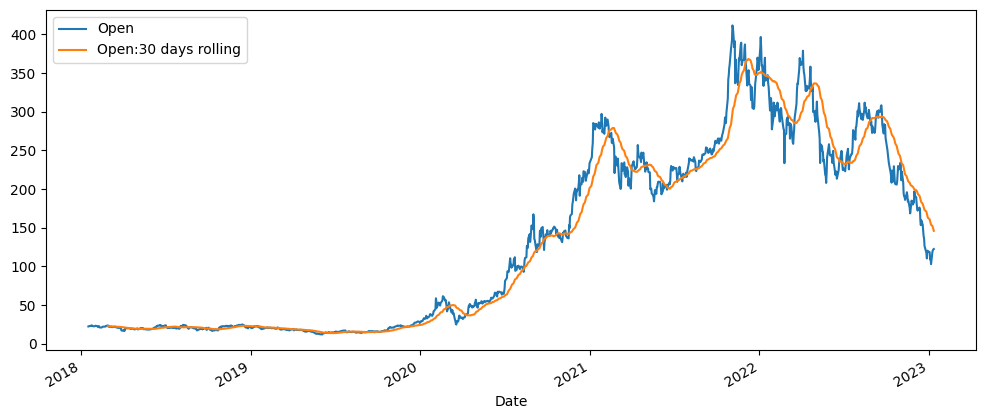

In [33]:
df_tesla[["Open", "Open:30 days rolling"]].plot(figsize=(12, 5))
plt.show()